# Transfer Learning

In [144]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings 

### Make predictions using ready made model (without any training)

In [68]:
IMAGE_SHAPE=(224,224)

classifier=keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

warnings.filterwarnings("ignore")

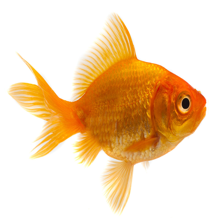

In [69]:
img=image.open("Goldfish-Image.jpg").resize(IMAGE_SHAPE)
img

In [70]:
img=np.array(img)/255
img

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [71]:
img=img[np.newaxis,...]

In [72]:
predictions=classifier.predict(img)

1/1 [==============================] - 2s 2s/step


In [73]:
predictions.shape

(1, 1001)

In [74]:
predicted_img_index=np.argmax(predictions)
predicted_img_index

2

In [77]:
image_labels=[]
with open("ImageNetLabels.txt","r") as f:
    image_labels=f.read().splitlines()
image_labels[0:5]    

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [78]:
image_labels[predicted_img_index]

'goldfish'

# Flower Dataset

In [79]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [85]:
data_dir

'.\\datasets\\flower_photos'

In [86]:
import pathlib

In [87]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [89]:
list(data_dir.glob("*/*.jpg"))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [90]:
image_count=len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [91]:
roses=list(data_dir.glob("roses/*"))

In [46]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

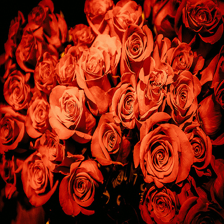

In [51]:
image.open(roses[2]).resize(IMAGE_SHAPE)

In [52]:
tulips=list(data_dir.glob("tulips/*"))
tulips[:3]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg')]

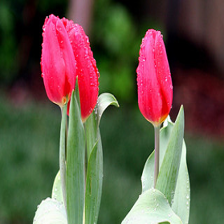

In [57]:
image.open(tulips[0]).resize(IMAGE_SHAPE)

In [93]:
img_=cv2.imread(str(roses[0]))

In [99]:
cv2.resize(img_,IMAGE_SHAPE).shape

(224, 224, 3)

## Reading the images into the numpy Array 

In [58]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [59]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [61]:
import cv2

In [151]:
X,y=[],[]
for image_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_image)
        y.append(flowers_labels_dict[image_name])

In [152]:
X=np.array(X)
y=np.array(y)

In [1]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

NameError: name 'X' is not defined

In [ ]:
len(X_train)

In [155]:
len(X_test)

918

In [156]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [125]:
X_train[0]

array([[[0.0627451 , 0.1254902 , 0.18823529],
        [0.05882353, 0.12156863, 0.18431373],
        [0.05490196, 0.11764706, 0.17254902],
        ...,
        [0.02352941, 0.02352941, 0.07843137],
        [0.02352941, 0.03137255, 0.07058824],
        [0.02352941, 0.03137255, 0.0745098 ]],

       [[0.05882353, 0.12156863, 0.18431373],
        [0.05098039, 0.11372549, 0.17647059],
        [0.04705882, 0.10980392, 0.17254902],
        ...,
        [0.00392157, 0.01568627, 0.07058824],
        [0.00392157, 0.01176471, 0.05490196],
        [0.01176471, 0.01960784, 0.0627451 ]],

       [[0.05490196, 0.12156863, 0.18039216],
        [0.04705882, 0.11372549, 0.17647059],
        [0.04313725, 0.10588235, 0.17254902],
        ...,
        [0.        , 0.01176471, 0.06666667],
        [0.        , 0.00784314, 0.0627451 ],
        [0.01176471, 0.01960784, 0.0627451 ]],

       ...,

       [[0.0745098 , 0.15294118, 0.19607843],
        [0.07058824, 0.14509804, 0.19607843],
        [0.06666667, 0

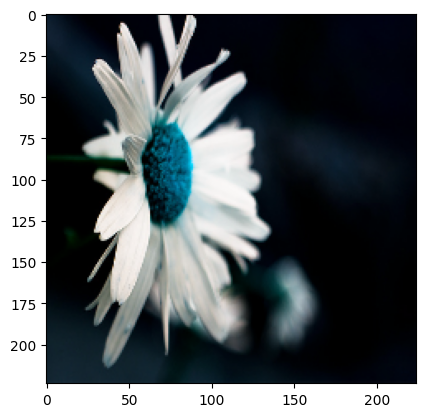

In [121]:
plt.imshow(X_train[0])

In [122]:
X_train[0]=np.array(X_train[0])

In [126]:
X_train[0]=X_train[0][np.newaxis,...]
X_train[0]

array([[[0.0627451 , 0.1254902 , 0.18823529],
        [0.05882353, 0.12156863, 0.18431373],
        [0.05490196, 0.11764706, 0.17254902],
        ...,
        [0.02352941, 0.02352941, 0.07843137],
        [0.02352941, 0.03137255, 0.07058824],
        [0.02352941, 0.03137255, 0.0745098 ]],

       [[0.05882353, 0.12156863, 0.18431373],
        [0.05098039, 0.11372549, 0.17647059],
        [0.04705882, 0.10980392, 0.17254902],
        ...,
        [0.00392157, 0.01568627, 0.07058824],
        [0.00392157, 0.01176471, 0.05490196],
        [0.01176471, 0.01960784, 0.0627451 ]],

       [[0.05490196, 0.12156863, 0.18039216],
        [0.04705882, 0.11372549, 0.17647059],
        [0.04313725, 0.10588235, 0.17254902],
        ...,
        [0.        , 0.01176471, 0.06666667],
        [0.        , 0.00784314, 0.0627451 ],
        [0.01176471, 0.01960784, 0.0627451 ]],

       ...,

       [[0.0745098 , 0.15294118, 0.19607843],
        [0.07058824, 0.14509804, 0.19607843],
        [0.06666667, 0

In [132]:
np.argmax(classifier.predict(np.array([X_train[0]])))

1/1 [==============================] - 0s 161ms/step


986

In [134]:
image_labels[986]

'daisy'

In [139]:
flowers_labels_dict["daisy"]

1

In [140]:
y_train[0]

1

## Now take pre-trained model and re-train it using flowers images

In [146]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer =hub.KerasLayer(feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [147]:
num_of_flowers = 5

model = keras.Sequential([
  pretrained_model_without_top_layer,
  keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [158]:
model.compile(
        optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=(["accuracy"])
)

model.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
86/86 [==============================] - 238s 3s/step - loss: 0.7712 - accuracy: 0.7100
Epoch 2/5
86/86 [==============================] - 215s 2s/step - loss: 0.4104 - accuracy: 0.8590
Epoch 3/5
86/86 [==============================] - 212s 2s/step - loss: 0.3165 - accuracy: 0.8964
Epoch 4/5
86/86 [==============================] - 213s 2s/step - loss: 0.2660 - accuracy: 0.9190
Epoch 5/5
86/86 [==============================] - 214s 2s/step - loss: 0.2256 - accuracy: 0.9346


In [159]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 86s 3s/step - loss: 0.3632 - accuracy: 0.8704


[0.3632066547870636, 0.8703703880310059]